In [1]:
import numpy as np
import pandas as pd
import jax.numpy as jnp
import os
from jax.config import config
import matplotlib.pyplot as plt
config.update('jax_enable_x64', True)

In [2]:
plt.rcParams['figure.figsize'] = (10,4)

In [3]:
from synthefit import *

In [4]:
data = pd.read_csv("data/UUCnc/uucnc_harps.csv")
wavlim = [5200, 5280]
#wavlim = [5360, 5440]
#wavlim = [5530, 5610]
wavlim = [6100, 6190]
#wavlim = [6210, 6260]
data

,wave,flux,flux_err
0,3781.68,132.395480,NaN
1,3781.69,170.684050,NaN
2,3781.70,43.629257,NaN
3,3781.71,2.029505,NaN
4,3781.72,41.961670,NaN
...,...,...,...
313190,6913.58,1478.028900,NaN
313191,6913.59,1282.961900,NaN
313192,6913.60,1023.029660,NaN
313193,6913.61,882.730300,NaN


In [5]:
idx = (data.wave > wavlim[0]) & (data.wave < wavlim[1])
data.flux_err = 1. / np.sqrt(data.flux)
wav_obs = np.array(data.wave[idx])
flux_obs = np.array(data.flux[idx])
flux_obs /= np.max(flux_obs)
error_obs = np.array(data.flux_err[idx])

/Users/k_masuda/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
data = pd.read_csv("data/J1249-1_H.csv")
data = pd.read_csv("data/J1249-2_H.csv")
data['wave'] = data.lam * 10

In [16]:
wavlim = [15570+5, 15680-5]

In [17]:
idx = (data.order==9) & (data.wave > wavlim[0]) & (data.wave < wavlim[1]) & (~data['mask'])

In [18]:
wav_obs = np.array(data.wave[idx])
flux_obs = np.array(data.bnormflux[idx])
error_obs = np.ones_like(flux_obs) / 60.

In [19]:
sg = SpecGrid(path="synthe_grid/synthe_%d-%d_normed.npz"%(wavlim[0]-5, wavlim[1]+5))

In [20]:
sf = SpecFit(sg, wav_obs, flux_obs, error_obs)

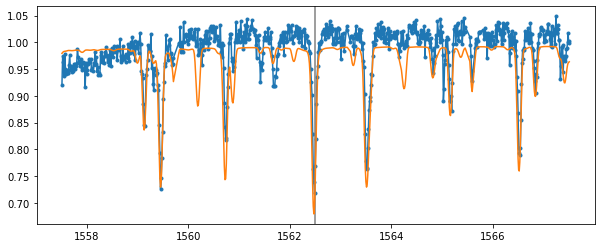

In [21]:
plt.plot(wav_obs/10., flux_obs, '.-')
plt.axvline(x=1562.5, color='gray')
plt.plot(wav_obs/10., sf.model([1, 0, 6000, 4, 0, 10, 3, -23]));

In [22]:
params_opt = sf.optim(vsinibounds=(1,10), zetabounds=(1,3), rvbounds=(-25,-20), method='TNC')

# initial objective function: -3081.633250353726
ScipyMinimizeInfo(fun_val=DeviceArray(-4103.7480893, dtype=float64), success=False, status=4, iter_num=15)
c0	1.008784
c1	0.037915
teff	5335.139689
logg	3.000000
feh	-0.522647
vsini	8.256389
zeta	3.000000
rv	-21.418519
lna	-4.055221
lnc	-0.211744
lnsigma	-12.649876


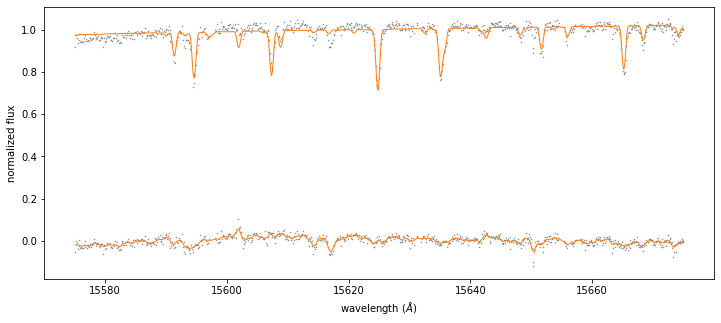

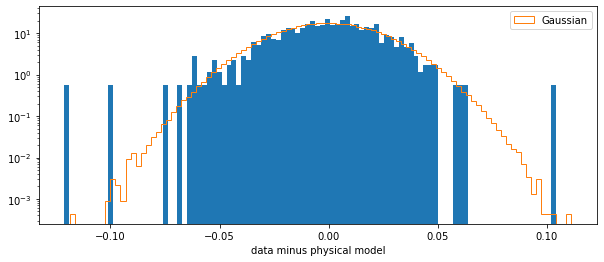

In [23]:
sf.qlplots(params_opt)

In [24]:
mcmc2 = sf.run_hmc(pinit=params_opt, nw=500, ns=500)

  0%|                                                                                                       | 0/1000 [00:00<?, ?it/s]/Users/k_masuda/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)
/Users/k_masuda/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/jax/_src/tree_util.py:189: FutureWarning: jax.tree_util.tree_multimap() is deprecated. Please use jax.tree_util.tree_map() instead as a drop-in replacement.
  'instead as a drop-in replacement.', FutureWarning)
sample: 100%|█████████████████████████████████████████| 1000/1000 [04:25<00:00,  3.76it/s, 63 steps of size 7.41e-02. acc. prob=0.92]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
        c0      1.02      0.01      1.02      1.01      1.03     61.14      1.00
        c1      0.03      0.01      0.03      0.01      0.05    124.52      1.00
       feh     -0.20      0.20     -0.14     -0.50      0.08     57.35      1.00
       lna     -4.03      0.09     -4.04     -4.19     -3.89    238.22      1.01
       lnc     -0.21      0.14     -0.21     -0.42      0.00    181.45      1.01
   lnsigma    -10.72      2.30    -10.76    -14.26     -7.17    294.18      1.00
      logg      3.11      0.98      3.12      1.62      4.76    160.08      1.00
        rv    -21.40      0.16    -21.41    -21.65    -21.14    331.57      1.00
      teff   6023.55    414.71   6117.34   5302.14   6601.89     71.55      1.00
     vsini      7.41      0.63      7.45      6.43      8.47    162.52      1.00

Number of divergences: 0


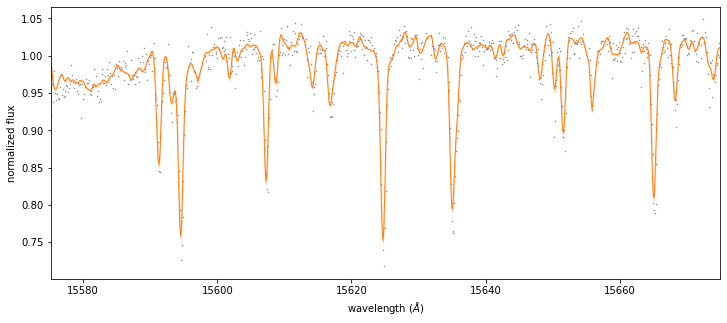

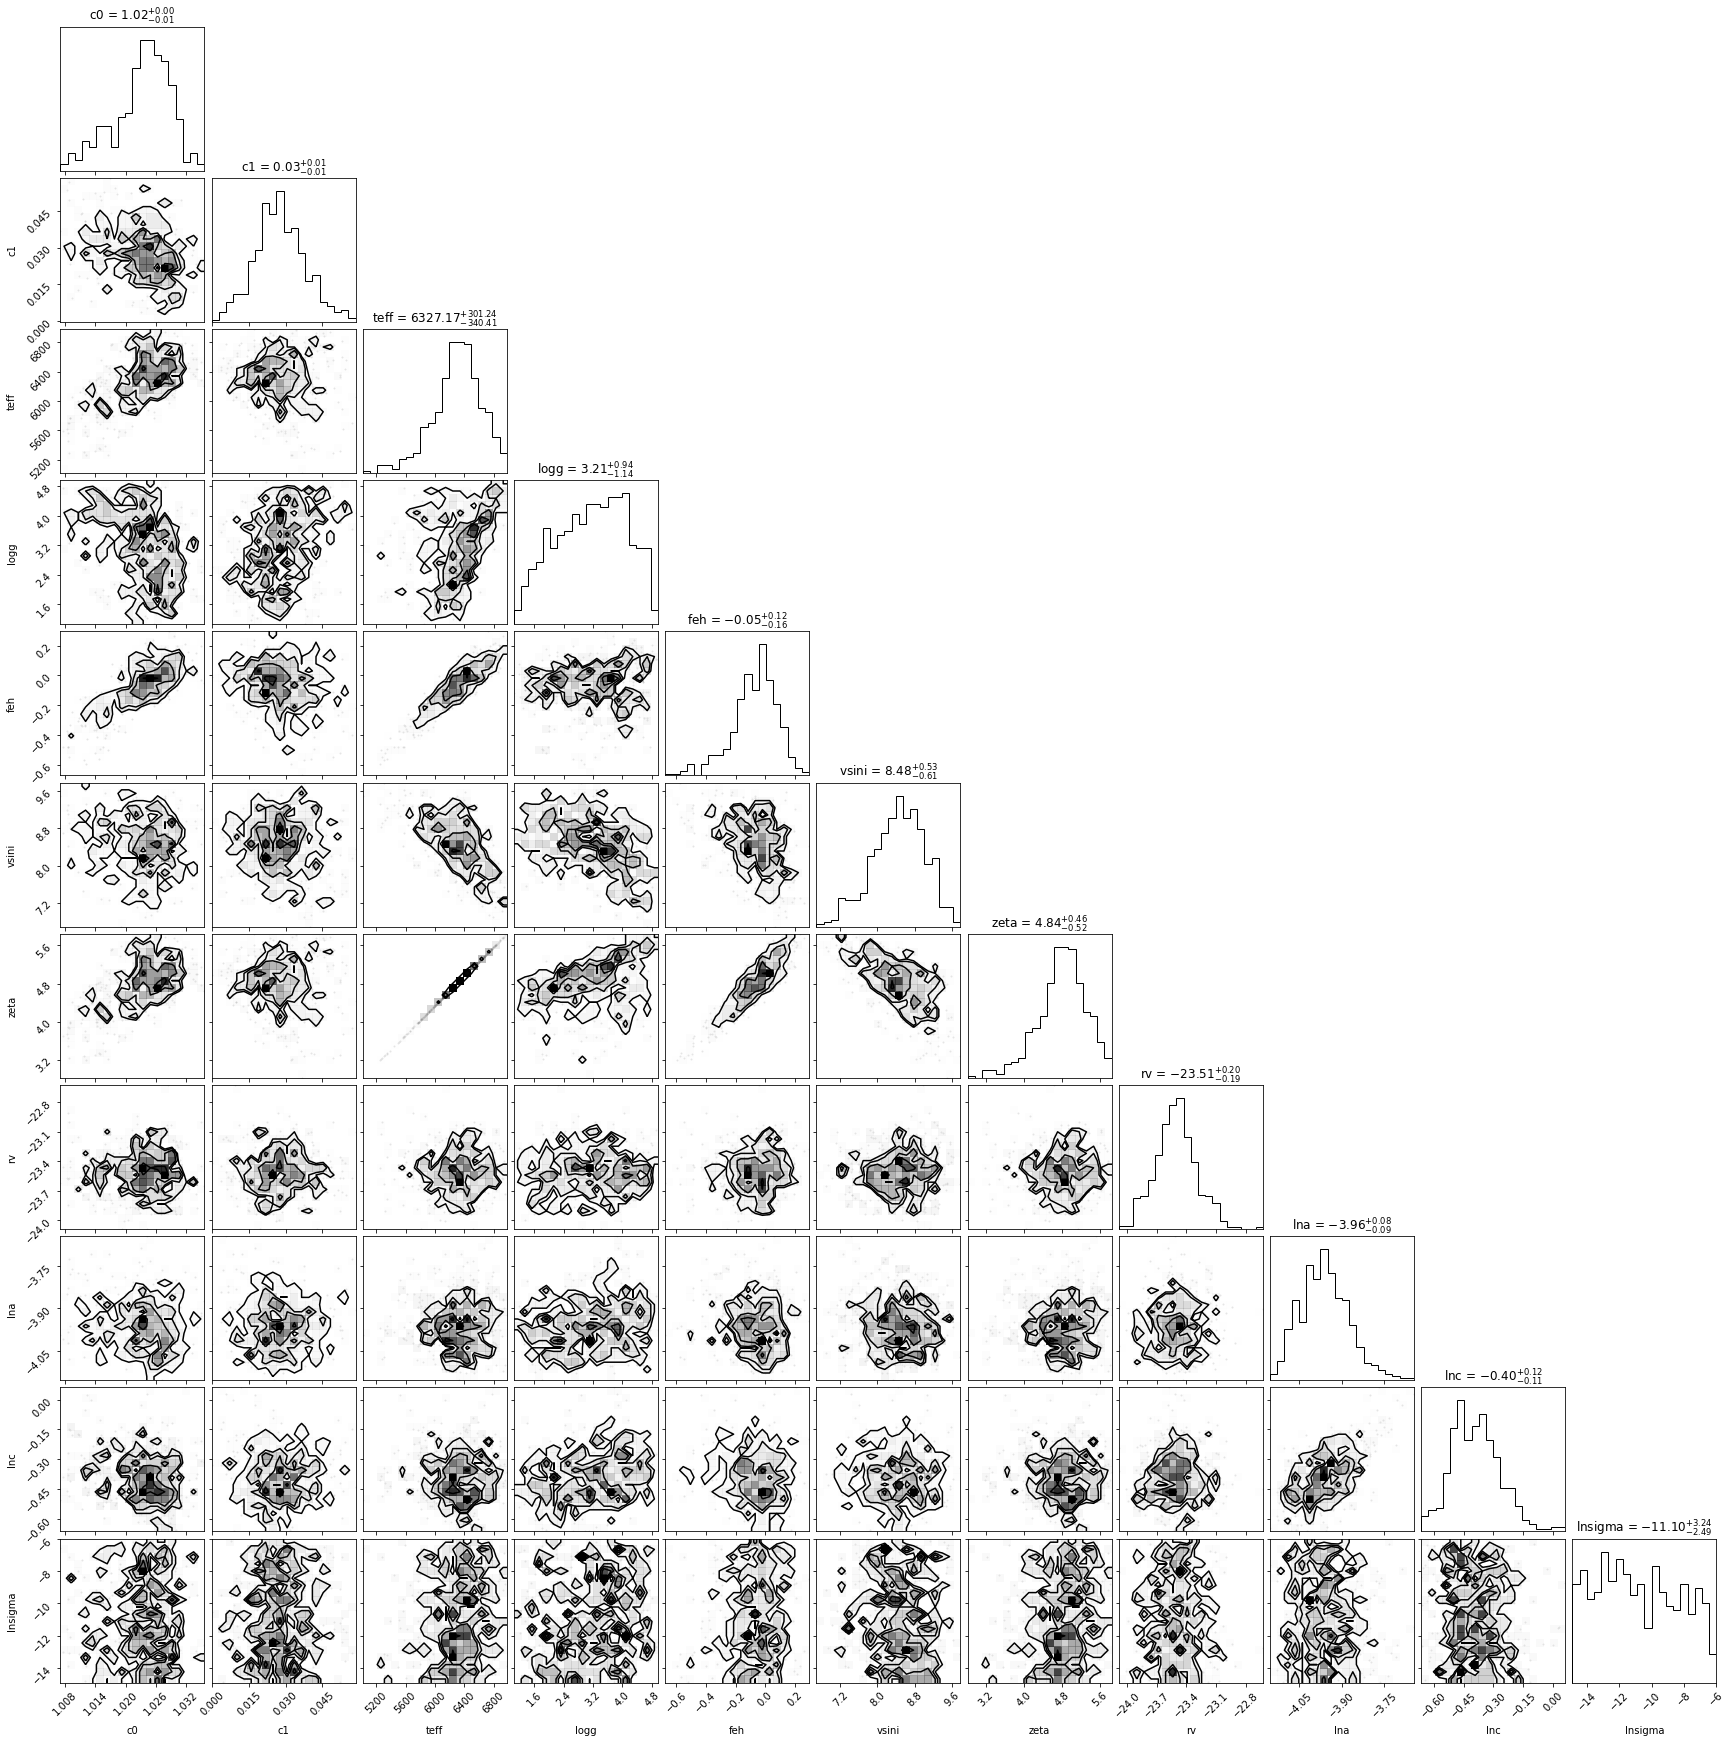

In [27]:
sf.mcmcplots(mcmc)

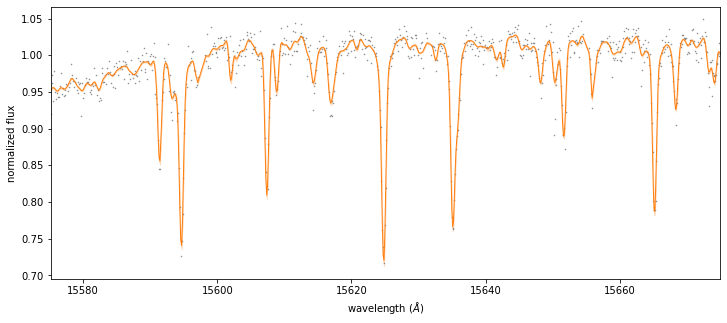

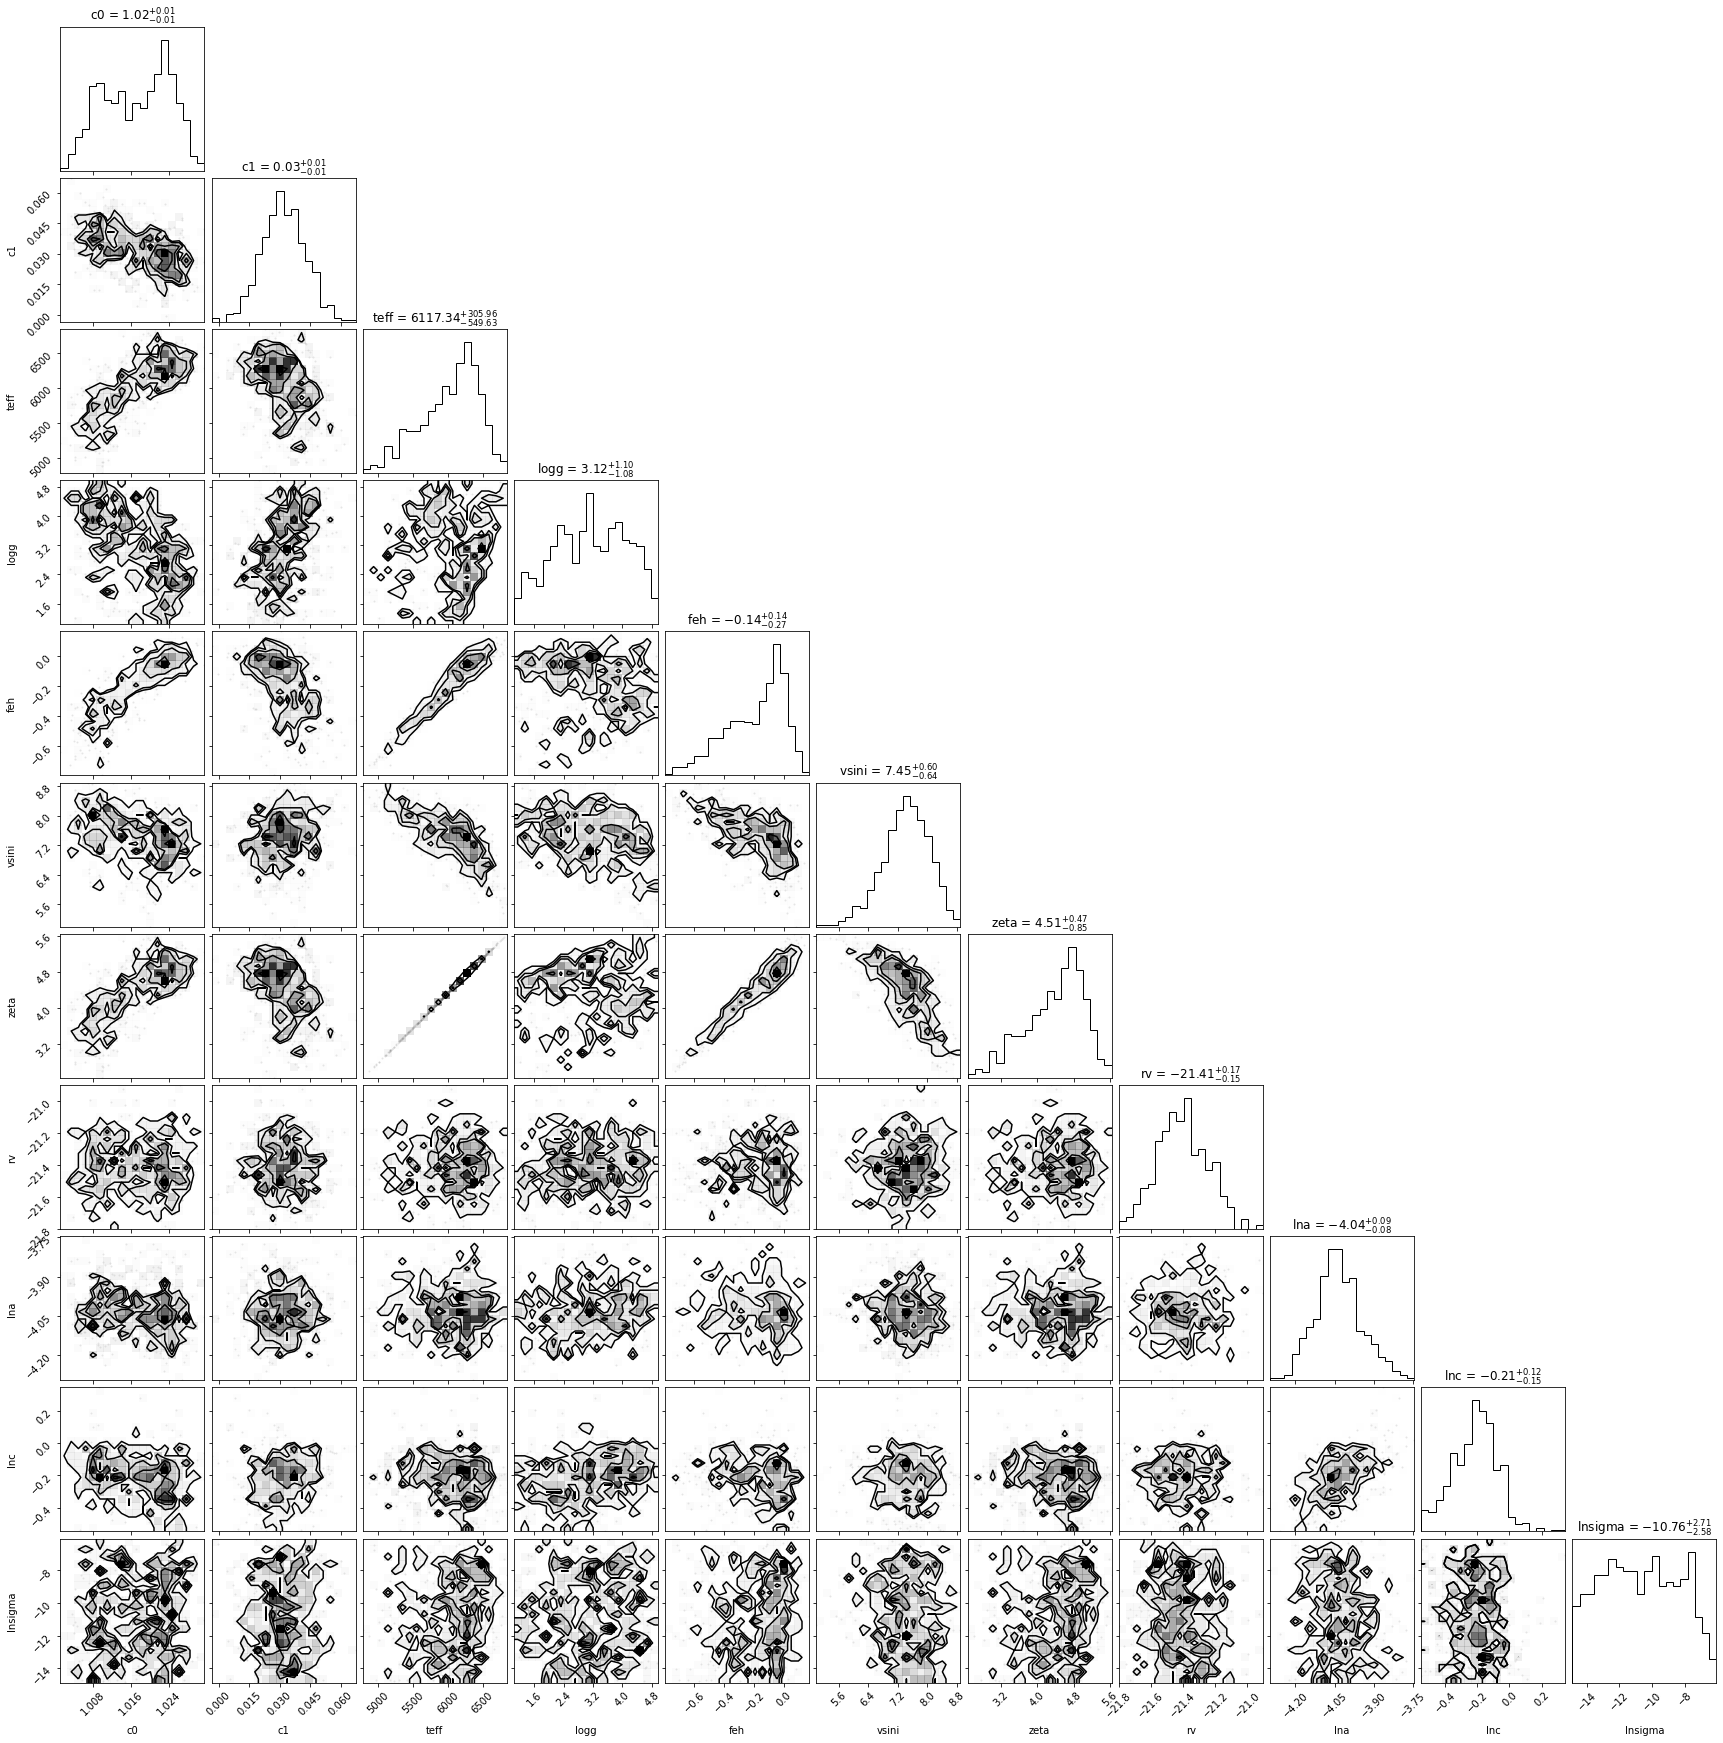

In [26]:
sf.mcmcplots(mcmc2)